In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10
import random
from sklearn import datasets

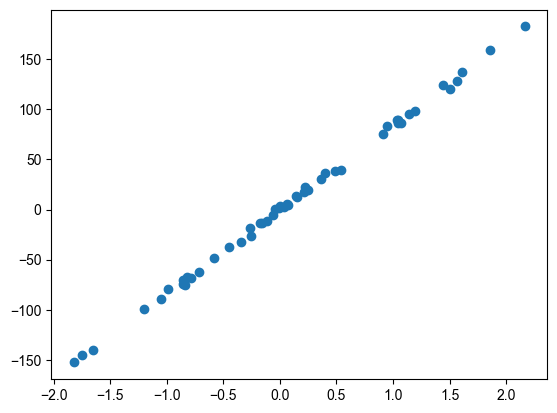

In [19]:
features, output, coef = datasets.make_regression(n_samples = 50, n_features = 1,
                                n_informative = 4, n_targets = 1,
                                noise =3, coef = True)


plt.scatter(features, output)
plt.show()
features = features.flatten()


In [20]:
features = features + 3
output = output + 200
output[28] = output[28]*0.95

In [21]:
x = features
# x = np.array([3.45911992, 3.56573467, 1.78139242, 3.95225689, 2.64184681,
#        3.18351928, 3.87642392, 2.0258817 , 3.08812277, 2.86000036,
#        4.30850336, 3.26290337, 2.54393686, 2.5458461 , 4.48025978,
#        2.99024705, 2.23717234, 2.91741775, 2.37427545, 3.1467342 ,
#        2.75528781, 2.78523102, 3.9168205 , 4.59150867, 3.53571352,
#        1.11981749, 3.66658368, 3.13277897, 3.14245584, 3.11996438,
#        2.84570599, 2.65536401, 4.32144097, 3.70422375, 3.90291142,
#        4.50081507, 3.40920459, 4.11899661, 4.64828225, 2.60084572,
#        4.99930006, 2.26422264, 2.92802495, 2.28257718, 2.54989846,
#        3.80558468, 3.09393446, 2.0998898 , 2.58442595, 2.97240129])

In [22]:
y = output
# y = np.array([186.241497  , 190.90140151,  55.14224617, 222.30351896,
#        119.53964491, 166.9298547 , 219.17499131,  73.77060326,
#        155.4687887 , 134.77584218, 246.61442335, 173.03249777,
#        115.75793484, 115.709252  , 263.22051783, 149.99583985,
#         89.96881036, 146.22257041,  99.82337663, 166.74190525,
#        130.07181184, 132.95251558, 223.10230312, 272.86116366,
#        193.68057968,   4.8806935 , 197.20490728, 160.80865986,
#        176.91203341, 164.67667103, 143.2800578 , 124.85831189,
#        253.76419738, 207.30885436, 212.91478181, 259.83453019,
#        180.45671813, 237.57686846, 278.41938084, 119.76745424,
#        302.34234718,  85.55780575, 143.49453157,  93.02761346,
#        113.32231645, 212.48841312, 157.66682375,  82.82624521,
#        115.09229485, 149.59519723])

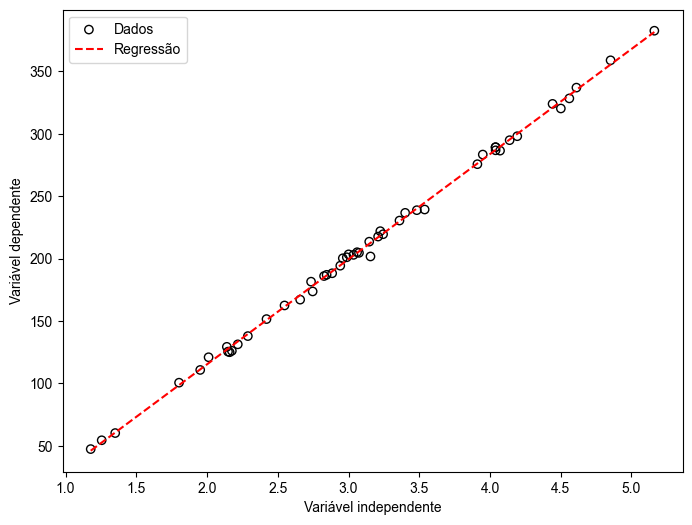

In [31]:
x, y = zip(*sorted(zip(x, y)))
x = np.array(x)
y = np.array(y)
y[28] = y[28]*0.95
reg = stats.linregress(x, y)
y_pred = reg[0]*x + reg[1]
std = np. sqrt(np.square(y - y_pred).sum()/(x.size - 2))

plt.figure(figsize=(8,6))
plt.scatter(x, y, facecolor="none", edgecolor='k', label="Dados")
plt.plot(x, y_pred, c='r', ls='--', label="Regressão")
plt.ylabel("Variável dependente")
plt.xlabel("Variável independente")
plt.legend(loc=2)
plt.show()

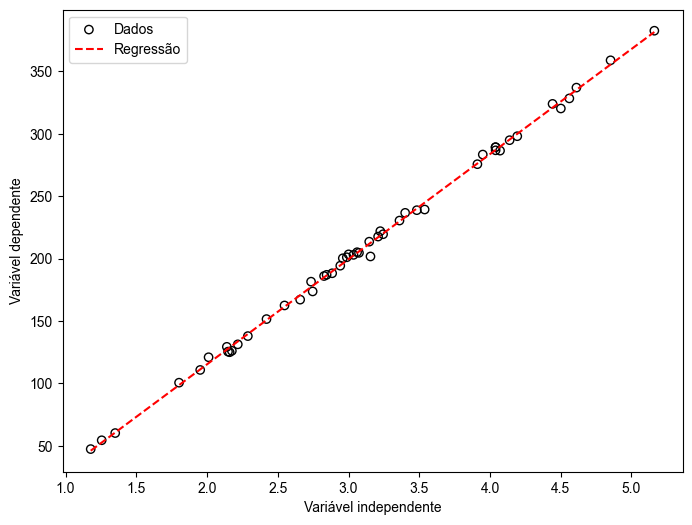

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, facecolor="none", edgecolor='k', label="Dados")
plt.plot(x, y_pred, c='r', ls='--', label="Regressão")
plt.ylabel("Variável dependente")
plt.xlabel("Variável independente")
plt.legend(loc=2)
plt.show()

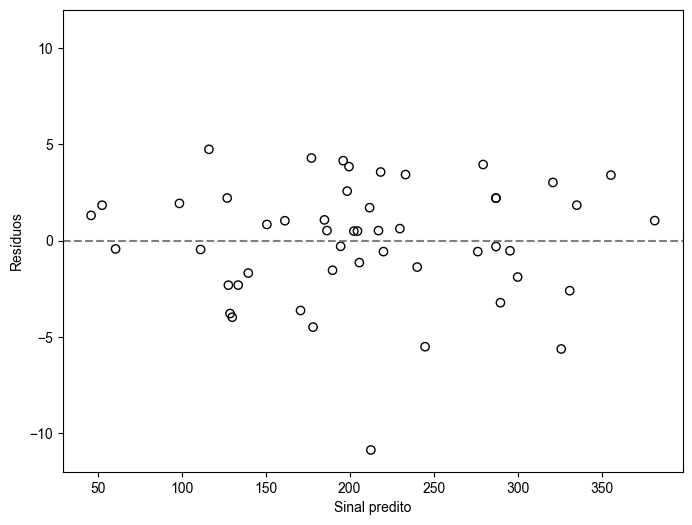

In [38]:
residuo = y - y_pred

# criando o canvas
plt.figure(figsize=(8,6))

plt.scatter(y_pred, residuo, edgecolors='k', facecolor='None', label="Resíduos")

# adicionado possíveis outliers, apenas se eles existirem
# if df_aux_padronizado.shape[0] > 0:
#     plt.scatter(df_aux_padronizado[colunas[0]], df_aux_padronizado[colunas[1]], 
#                 edgecolors='none', facecolor='r',  label="Possíveis outliers")

    
#     plt.legend()


plt.xlabel("Sinal predito")
plt.ylabel("Resíduos")
plt.axhline(y=0, color="gray", linestyle="--")


plt.ylim(bottom= -12, top = 12 )  
plt.show()

In [ ]:
residuo = residuo/std

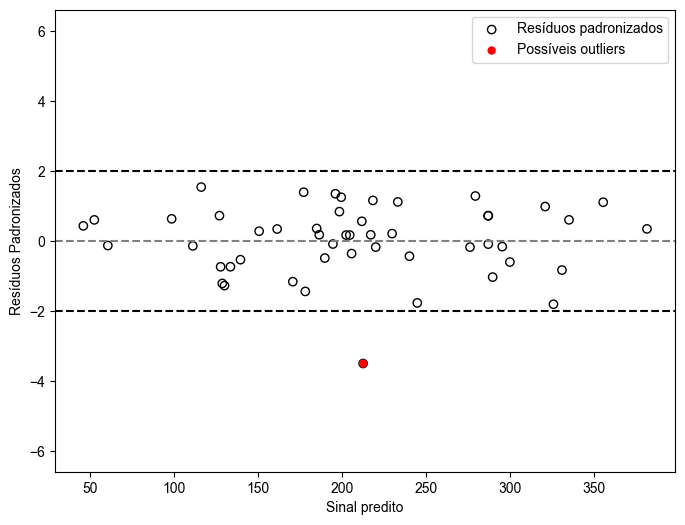

In [50]:

limite_padronizado = 2

# obtendo maior resíduo (absoluto) para utilizar como y_min
y_min = 6


# criando o canvas
plt.figure(figsize=(8,6))
# adicionando os resíduos
plt.scatter(y_pred, residuo, edgecolors='k', facecolor='None', label="Resíduos padronizados")

# adicionado possíveis outliers, apenas se eles existirem
for data_x, data_y in zip(y_pred, residuo):
    if np.abs(data_y) > limite_padronizado:

        plt.scatter(data_x, data_y, 
                    edgecolors='none', facecolor='r',  label="Possíveis outliers")


        plt.legend()


plt.xlabel("Sinal predito")
plt.ylabel("Resíduos Padronizados")
plt.axhline(y=0, color="gray", linestyle="--")
plt.axhline(y=limite_padronizado, color="k", linestyle="--")
plt.axhline(y=-1*limite_padronizado, color="k", linestyle="--")

plt.ylim(bottom= -1.1*y_min, top = 1.1*y_min )  
plt.show()

In [ ]:
residuo[28]